In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h = fits.open('Morph_RM_Matched Group')

In [3]:
h.info()

Filename: Morph_RM_Matched Group
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (8074,)   uint8   
  1  Joined        1 BinTableHDU    192   2323R x 79C   [J, E, D, D, E, E, E, E, E, E, 4E, 4E, E, E, E, E, E, E, E, E, E, E, E, K, K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D, J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, D, D]   


In [4]:
H = h[1].data
Morph = H.field(27)
Radius = H.field(4)
print(Radius)

[0.         0.         0.         ... 0.98399365 0.99238235 1.0786723 ]


In [5]:
Stack = np.vstack((Radius, Morph))
print(Stack)

[[ 0.          0.          0.         ...  0.98399365  0.99238235
   1.07867229]
 [ 1.         -1.         -1.         ... -1.          1.
   1.        ]]


In [6]:
Bin_1, Bin_2, Bin_3, Bin_4, Bin_5, Bin_6, Bin_7, Bin_8 = np.hsplit(Stack, np.array([494, 871, 1282, 1729, 2094, 2254, 2310]))

In [7]:
def fraction(array):
    Mor = array[1]
    Spi = 0
    Ell = 0
    Len = 0
    for i in Mor:
        if i == 1:
            Spi = Spi + 1
        elif i == 0:
            Ell = Ell + 1
        else:
            Len = Len + 1
    return Spi/len(Mor), Ell/len(Mor), Len/len(Mor)

def fract(array):
    Mor = array[1]
    Spi = 0
    Ell = 0
    Len = 0
    for i in Mor:
        if i == 1:
            Spi = Spi + 1
        elif i == 0:
            Ell = Ell + 1
        else:
            Len = Len + 1
    return Spi, Ell, Len

In [8]:
Spiral_1, Elliptical_1, Lenticular_1 = fraction(Bin_1)
Spiral_2, Elliptical_2, Lenticular_2 = fraction(Bin_2)
Spiral_3, Elliptical_3, Lenticular_3 = fraction(Bin_3)
Spiral_4, Elliptical_4, Lenticular_4 = fraction(Bin_4)
Spiral_5, Elliptical_5, Lenticular_5 = fraction(Bin_5)
Spiral_6, Elliptical_6, Lenticular_6 = fraction(Bin_6)
Spiral_7, Elliptical_7, Lenticular_7 = fraction(Bin_7)
Spiral_8, Elliptical_8, Lenticular_8 = fraction(Bin_8)

Spi_1, Ell_1, Len_1 = fract(Bin_1)
Spi_2, Ell_2, Len_2 = fract(Bin_2)
Spi_3, Ell_3, Len_3 = fract(Bin_3)
Spi_4, Ell_4, Len_4 = fract(Bin_4)
Spi_5, Ell_5, Len_5 = fract(Bin_5)
Spi_6, Ell_6, Len_6 = fract(Bin_6)
Spi_7, Ell_7, Len_7 = fract(Bin_7)
Spi_8, Ell_8, Len_8 = fract(Bin_8)

In [9]:
Spirals = [Spiral_1, Spiral_2, Spiral_3, Spiral_4, Spiral_5, Spiral_6, Spiral_7, Spiral_8]
Ellipticals = [Elliptical_1, Elliptical_2, Elliptical_3, Elliptical_4, Elliptical_5, Elliptical_6, Elliptical_7, Elliptical_8]
Lenticulars = [Lenticular_1, Lenticular_2, Lenticular_3, Lenticular_4, Lenticular_5, Lenticular_6, Lenticular_7, Lenticular_8]

Spis = [Spi_1, Spi_2, Spi_3, Spi_4, Spi_5, Spi_6, Spi_7, Spi_8]
Ells = [Ell_1, Ell_2, Ell_3, Ell_4, Ell_5, Ell_6, Ell_7, Ell_8]
Lens = [Len_1, Len_2, Len_3, Len_4, Len_5, Len_6, Len_7, Len_8]
Radii = np.array([0.065, 0.195, 0.325, 0.455, 0.585, 0.715, 0.845, 0.975])

[-0.71075171  0.5706057   0.55322612]
[ 0.46580075 -0.37288839  0.12341229]
[ 0.24495097 -0.19771732  0.32336158]


Text(0.5, 1.0, 'Morphology vs Distance From Cluster Centre (Group Members)')

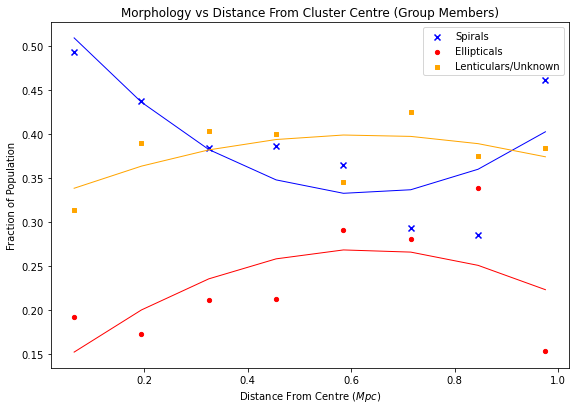

In [15]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x + b*x**2 + c

popt, pcov = curve_fit(func, Radii, Spirals)
print(popt)

popt2, pcov2 = curve_fit(func, Radii, Ellipticals)
print(popt2)

popt3, pcov3 = curve_fit(func, Radii, Lenticulars)
print(popt3)

plt.figure(1).add_axes((0,0,1.2,1.2))

plt.plot(Radii, func(Radii, *popt), color = 'blue', linewidth = '1')
plt.plot(Radii, func(Radii, *popt2), color = 'red', linewidth = '1')
plt.plot(Radii, func(Radii, *popt3), color = 'orange', linewidth = '1')

plt.scatter(Radii, Spirals, marker = 'x', color = 'blue', label = 'Spirals')
plt.scatter(Radii, Ellipticals, s=18, marker = 'o', color = 'red', label = 'Ellipticals')
plt.scatter(Radii, Lenticulars, s=16, marker = 's', color = 'orange', label = 'Lenticulars/Unknown')

plt.xlabel("Distance From Centre ($Mpc$)")
plt.ylabel("Fraction of Population")
plt.legend(loc = 'upper right')
plt.title("Morphology vs Distance From Cluster Centre (Group Members)")

[-176.55673908  -75.3733803   236.62796952]
[ 142.49084378 -224.71118735   70.85416639]
[ 158.33333835 -330.7269698   144.81398709]


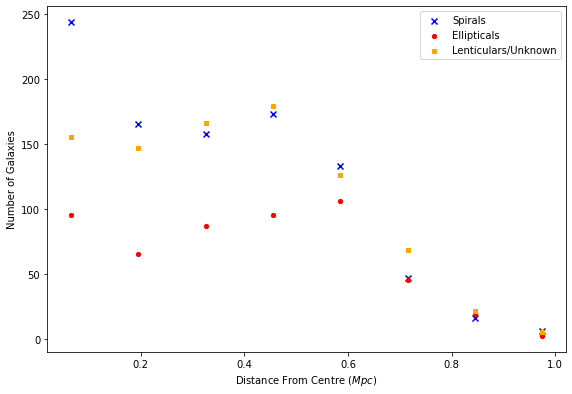

In [17]:
popt4, pcov4 = curve_fit(func, Radii, Spis)
print(popt4)

popt5, pcov5 = curve_fit(func, Radii, Ells)
print(popt5)

popt6, pcov6 = curve_fit(func, Radii, Lens)
print(popt6)

plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(Radii, Spis, marker = 'x', color = 'blue', label = 'Spirals')
plt.scatter(Radii, Ells, s=18, marker = 'o', color = 'red', label = 'Ellipticals')
plt.scatter(Radii, Lens, s=16, marker = 's', color = 'orange', label = 'Lenticulars/Unknown')

plt.xlabel("Distance From Centre ($Mpc$)")
plt.ylabel("Number of Galaxies")
plt.legend(loc = 'upper right')